In [181]:
# https://www.ree.es/es/actividades/operacion-del-sistema-electrico/medidas-electricas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm


Bad key "text.kerning_factor" on line 4 in
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
%pwd

'/Users/joseangelvelasco/Google Drive'

In [5]:
all_files = glob.glob("/Volumes/HDD/data/ree/profiles/data/*.csv")
df = pd.concat([pd.read_csv(f, sep=';') for f in tqdm(all_files)])

0it [00:00, ?it/s]


ValueError: No objects to concatenate

In [84]:
df.head()

,year,month,day,hour,season,coef_a,coef_b,coef_c,coef_d,Unnamed: 9
0,2020,8,1,1,1,0.000120,0.000140,0.000116,0.000165,NaN
1,2020,8,1,2,1,0.000104,0.000128,0.000106,0.000171,NaN
2,2020,8,1,3,1,0.000092,0.000118,0.000100,0.000166,NaN
3,2020,8,1,4,1,0.000085,0.000112,0.000096,0.000160,NaN
4,2020,8,1,5,1,0.000080,0.000109,0.000095,0.000154,NaN


In [88]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

In [95]:
def convert_to_datetime(row):
    import datetime
    return datetime.datetime(row['year'], row['month'], row['day'])

In [1]:
def convert_to_timestamp(row):
    return pd.Timestamp(row['year'], row['month'], row['day'])

In [2]:
df['timestamp'] = df.apply(lambda row: convert_to_timestamp(row), axis=1)

NameError: name 'df' is not defined

In [160]:
df['coef_a'] = df['coef_a']*100000
df['coef_b'] = df['coef_b']*100000
df['coef_c'] = df['coef_c']*100000
df['coef_d'] = df['coef_d']*100000

In [161]:
df.head()

,year,month,day,hour,season,coef_a,coef_b,coef_c,coef_d,Unnamed: 9,timestamp
0,2020,8,1,1,1,12.024420,13.951619,11.648084,16.457073,NaN,2020-08-01
1,2020,8,1,2,1,10.417400,12.769401,10.553833,17.109488,NaN,2020-08-01
2,2020,8,1,3,1,9.236551,11.823026,9.955357,16.604728,NaN,2020-08-01
3,2020,8,1,4,1,8.484974,11.234728,9.632903,15.962028,NaN,2020-08-01
4,2020,8,1,5,1,8.032737,10.866495,9.497185,15.428142,NaN,2020-08-01


In [164]:
df.tail()

,year,month,day,hour,season,coef_a,coef_b,coef_c,coef_d,Unnamed: 9,timestamp
739,2020,8,31,20,1,12.824927,8.813858,12.383767,7.537673,NaN,2020-08-31
740,2020,8,31,21,1,12.876826,9.132481,11.951109,7.845383,NaN,2020-08-31
741,2020,8,31,22,1,14.158936,12.684372,12.055711,13.730726,NaN,2020-08-31
742,2020,8,31,23,1,13.753319,13.863928,11.033162,17.363237,NaN,2020-08-31
743,2020,8,31,24,1,11.942688,13.178795,9.923478,16.016406,NaN,2020-08-31


$$
\epsilon = 10\cdot \sqrt{\frac{\frac{1}{n} + (\hat{y} - \bar{y})^2}{{\sum_{i}(\hat{y}_{i} - \bar{y})^2}}}
$$

Text(0.5, 1.0, 'Plot 2')

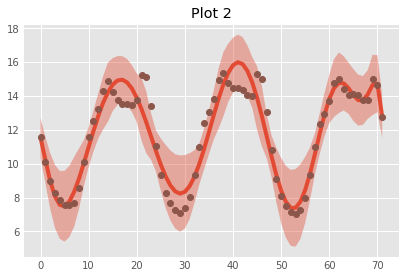

In [206]:
ts = df[(df['timestamp']>'2020-08-01') & (df['timestamp']<'2020-08-05') ]
ts.reset_index(inplace=True, drop=True)

x = ts.index.values
y = ts['coef_a'].values

# fit a linear curve an estimate its y-values and their error.
pol_12 = np.poly1d(np.polyfit(x, y, 12))
y_est = pol_12(x)
y_err = 10 *(np.sqrt(1/len(y) + (y - y.mean())**2 / np.sum((y - y.mean())**2)))


#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#plt.style.use('seaborn-colorblind')
#plt.style.use('seaborn-pastel')
fig, ax1 = plt.subplots()
ax1.plot(x, y_est, '-')
ax1.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.4)
ax1.plot(x, y, 'o', color='tab:brown')
ax1.set_title('Plot 2')

In [163]:
ts.head()

,year,month,day,hour,season,coef_a,coef_b,coef_c,coef_d,Unnamed: 9,timestamp


/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Plot 2')

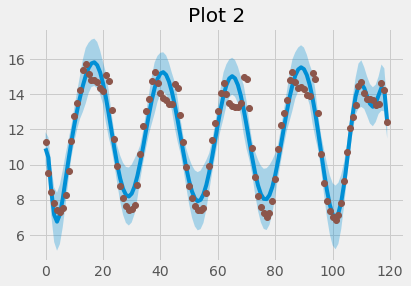

In [203]:
ts = df[(df['timestamp']>'2020-08-06') & (df['timestamp']<'2020-08-12') ]
ts.reset_index(inplace=True, drop=True)

x = ts.index.values
y = ts['coef_a'].values

# fit a linear curve an estimate its y-values and their error.
pol_12 = np.poly1d(np.polyfit(x, y, 30))
y_est = pol_12(x)
y_err = 10* (np.sqrt(1/len(y) +(y - y.mean())**2 / np.sum((y - y.mean())**2)))

plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('seaborn-colorblind')
#plt.style.use('seaborn-pastel')
fig, ax1 = plt.subplots()
ax1.plot(x, y_est, '-')
ax1.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.3)
ax1.plot(x, y, 'o', color='tab:brown')
ax1.set_title('Plot 2')